In [120]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# import KNeighbors ClaSSifier from sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import normalize
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score 
from sklearn.inspection import permutation_importance
from sklearn.model_selection import validation_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from numpy import mean
from numpy import std

import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [121]:
train = pd.read_csv('train.csv')
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [122]:
ageMedian = train['Age'].median()
train['Sex'] = train['Sex'].replace(['female','male'],[0,1])
train['Age'] = train['Age'].replace(np.NaN,ageMedian)

In [123]:
train['Minor'] = train.apply(lambda x :  1 if x['Age'] < 16 else 0  ,axis=1)

train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Minor
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",1,28.0,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C,1


In [124]:
train = train.assign(FamilySize = lambda x :  x.SibSp + x.Parch  )
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Minor,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,0,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0,0
5,6,0,3,"Moran, Mr. James",1,28.0,0,0,330877,8.4583,NaN,Q,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S,0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S,1,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S,0,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C,1,1


In [125]:
train['Alone'] = train.apply(lambda x :  1 if x['FamilySize'] == 0 else 0  ,axis=1)

train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Minor,FamilySize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0,0,1
5,6,0,3,"Moran, Mr. James",1,28.0,0,0,330877,8.4583,NaN,Q,0,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S,0,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S,1,4,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S,0,2,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C,1,1,0


In [126]:
y = train['Name'].str.split()
y

0                           [Braund,, Mr., Owen, Harris]
1      [Cumings,, Mrs., John, Bradley, (Florence, Bri...
2                             [Heikkinen,, Miss., Laina]
3      [Futrelle,, Mrs., Jacques, Heath, (Lily, May, ...
4                          [Allen,, Mr., William, Henry]
                             ...                        
886                            [Montvila,, Rev., Juozas]
887                    [Graham,, Miss., Margaret, Edith]
888       [Johnston,, Miss., Catherine, Helen, "Carrie"]
889                           [Behr,, Mr., Karl, Howell]
890                              [Dooley,, Mr., Patrick]
Name: Name, Length: 891, dtype: object

In [127]:
new = train["Name"].str.split(" ", n = -1, expand = True) 

train["Title"]= new[1]  

train["First Name"]= new[2] 
# making seperate last name column from new data frame
train["Surname"]= new[0]
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Minor,FamilySize,Alone,Title,First Name,Surname
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,0,Mr.,Owen,"Braund,"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,Mrs.,John,"Cumings,"
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,Miss.,Laina,"Heikkinen,"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,0,1,0,Mrs.,Jacques,"Futrelle,"
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0,0,1,Mr.,William,"Allen,"


In [128]:
train['Surname'] = train['Surname'].str.replace(',',' ')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Minor,FamilySize,Alone,Title,First Name,Surname
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,0,Mr.,Owen,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,Mrs.,John,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,Miss.,Laina,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,0,1,0,Mrs.,Jacques,Futrelle
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0,0,1,Mr.,William,Allen


In [129]:
def surnameallDied(df, sf):
  count = 0
  survived = 0
  for i in range(1,len(df)-1):
    if df[i] == df[i+1]:
      count += 1
      if sf[i] == 1 or sf[i+1] == 1:
        survived += 1

    
  if count == 0 or count == 1:
    print(count)
  elif count >= 2 and survived == 0:
    print(count)


In [130]:
y = train.Survived
x = train.drop(['Survived', 'Cabin', 'Ticket', 'Embarked', 'Name', 'PassengerId','Title','First Name','Surname'], axis = 1)
x.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Minor,FamilySize,Alone
0,3,1,22.0,1,0,7.2500,0,1,0
1,1,0,38.0,1,0,71.2833,0,1,0
2,3,0,26.0,0,0,7.9250,0,0,1
3,1,0,35.0,1,0,53.1000,0,1,0
4,3,1,35.0,0,0,8.0500,0,0,1
5,3,1,28.0,0,0,8.4583,0,0,1
6,1,1,54.0,0,0,51.8625,0,0,1
7,3,1,2.0,3,1,21.0750,1,4,0
8,3,0,27.0,0,2,11.1333,0,2,0
9,2,0,14.0,1,0,30.0708,1,1,0


In [131]:
# x = x.assign(Minor = lambda x :  1 if x.Age[0] < 16 else 0  )
# y = surnameallDied(train.Surname.to_list(), train.Survived.to_list())
# y
# train = train.assign(SurnameAllDied =  surnameallDied(train.Surname.to_list(), train.Survived.to_list()) )
# train.head(10)


In [132]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [133]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((712, 9), (179, 9))

In [134]:
X_test.isnull().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Minor         0
FamilySize    0
Alone         0
dtype: int64

# KNN Model

In [18]:
cols = X_train.columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])

X_test = pd.DataFrame(X_test, columns=[cols])

In [19]:
# instantiate the model
knn = KNeighborsClassifier(n_neighbors=5)


# fit the model to the training set
knn.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


KNeighborsClassifier()

In [20]:
y_pred = knn.predict(X_test)

y_pred

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


array([0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0])

In [21]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Minor,FamilySize,Alone
0,0.819251,0.728823,-0.106848,-0.464452,-0.477410,-0.347398,-0.319636,-0.553956,0.809823
1,0.819251,0.728823,-0.106848,-0.464452,-0.477410,-0.485288,-0.319636,-0.553956,0.809823
2,0.819251,0.728823,-1.710056,3.044196,0.740927,-0.054650,3.128559,2.452269,-1.234837
3,-1.581187,-1.372075,-0.106848,0.412710,-0.477410,2.288576,-0.319636,0.047289,-1.234837
4,0.819251,-1.372075,-0.030505,-0.464452,1.959264,-0.331679,-0.319636,0.648534,-1.234837
...,...,...,...,...,...,...,...,...,...
174,0.819251,-1.372075,-1.251997,-0.464452,-0.477410,-0.491691,3.128559,-0.553956,0.809823
175,0.819251,0.728823,-0.106848,-0.464452,-0.477410,-0.475308,-0.319636,-0.553956,0.809823
176,-1.581187,-1.372075,0.122181,0.412710,-0.477410,1.624988,-0.319636,0.047289,-1.234837
177,0.819251,0.728823,-0.488564,-0.464452,-0.477410,-0.479216,-0.319636,-0.553956,0.809823


In [22]:
# probability of getting output death

x_pred_proba = knn.predict_proba(X_test)[:,0]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [23]:
# probability of getting output survived
y_pred_proba = knn.predict_proba(X_test)[:,1]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [24]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7989


In [25]:
y_pred_train = knn.predict(X_train)

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8722


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [26]:
# print the scores on training and test set
train_scores = knn.score(X_train, y_train)
test_scores = knn.score(X_test, y_test)
print('Training set score: {:.4f}'. format(knn.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 0.8722
Test set score: 0.7989


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [27]:
neighbors = np.arange(1,5)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.

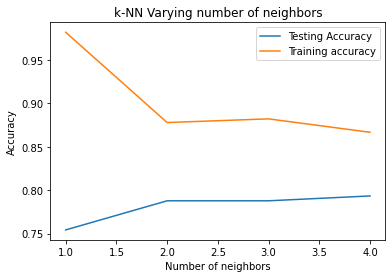

In [28]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


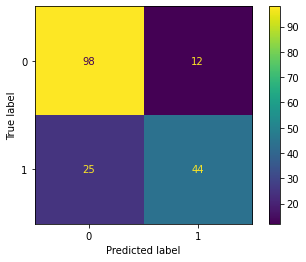

In [29]:
#import confusion_matrix

con_mat = confusion_matrix(y_test,y_pred)

plot_confusion_matrix(knn, X_test, y_test)  
plt.show()
# con_mat
# sns.heatmap(con_mat, annot=True, fmt='d', cmap='YlGnBu')

In [30]:
print(classification_report(y_test, y_pred))
roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       110
           1       0.75      0.71      0.73        69

    accuracy                           0.80       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



0.7823451910408431

In [31]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train, y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/li

Best leaf_size: 1
Best p: 2
Best n_neighbors: 14


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


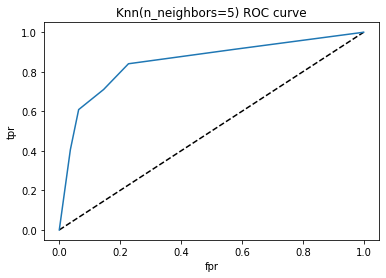

In [32]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=5) ROC curve')
plt.show()

In [33]:
def plot_curve(ticks, train_scores, test_scores):
    train_scores_mean = -1 * np.mean(train_scores, axis=1)
    train_scores_std = -1 * np.std(train_scores, axis=1)
    test_scores_mean = -1 * np.mean(test_scores, axis=1)
    test_scores_std = -1 * np.std(test_scores, axis=1)

    plt.figure()
    plt.fill_between(ticks, 
                     train_scores_mean - train_scores_std, 
                     train_scores_mean + train_scores_std, alpha=0.1, color="b")
    plt.fill_between(ticks, 
                     test_scores_mean - test_scores_std, 
                     test_scores_mean + test_scores_std, alpha=0.1, color="r")
    plt.plot(ticks, train_scores_mean, 'b-', label='Training score')
    plt.plot(ticks, test_scores_mean, 'r-', label='Test score')
    plt.legend(fancybox=True, facecolor='w')

    return plt.gca()

In [34]:
nums_of_folds = 5
def plot_validation_curve(knn, X, y, param_name, param_range, scoring='roc_auc'):
    plt.xkcd()
    ax = plot_curve(param_range, *validation_curve(knn, X, y, cv=nums_of_folds, 
                                                   scoring=scoring, 
                                                   param_name=param_name, 
                                                   param_range=param_range, n_jobs=-1))
    ax.set_title('')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xlim(2,12)
    ax.set_ylim(-0.97, -0.83)
    ax.set_ylabel('Error')
    ax.set_xlabel('Model complexity')
  
    ax.axvline(7, ls='--')
    plt.tight_layout()

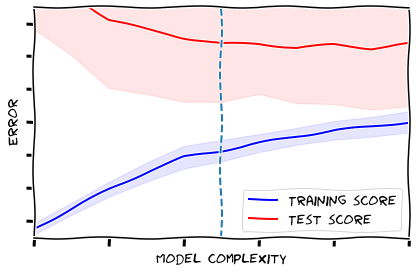

In [35]:

plot_validation_curve(knn, X_train, y_train, param_name="n_neighbors", param_range=range(2,13))


In [38]:
error_rate = []
# Might take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.

Text(0, 0.5, 'Error Rate')

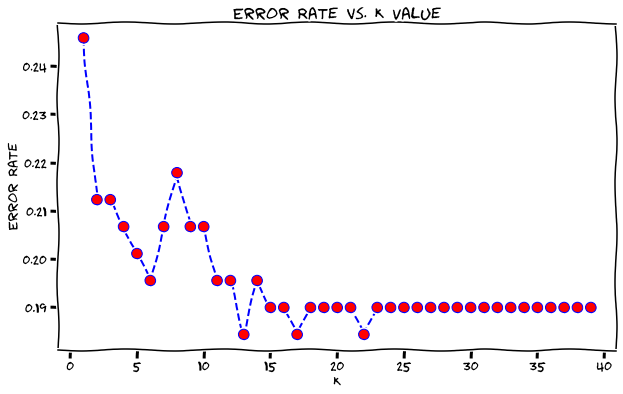

In [39]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [40]:
knn_result = permutation_importance(knn, X_train, y_train, n_repeats=11,random_state=0)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.

In [41]:
knn_result_mean = knn_result.importances_mean
knn_result_mean

array([0.00651175, 0.23455056, 0.00242594, 0.02591931, 0.00778856,
       0.00574566, 0.02336568, 0.02208887, 0.0020429 ])

In [42]:
knn_result_std = knn_result.importances_std
knn_result_std

array([0.00370496, 0.01341808, 0.00268435, 0.00283211, 0.00242258,
       0.0021135 , 0.00329507, 0.00216682, 0.00092072])

In [49]:
feature_names = [f'feature {i}' for i in range(x.shape[1])]
feature_names

['feature 0',
 'feature 1',
 'feature 2',
 'feature 3',
 'feature 4',
 'feature 5',
 'feature 6',
 'feature 7',
 'feature 8']

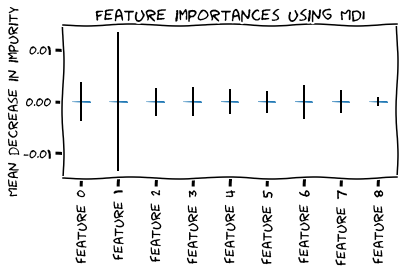

In [50]:
knn_importances = pd.Series(knn_result, index=feature_names)

fig, ax = plt.subplots()
knn_importances.plot.bar(yerr=knn_result_std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

# Logitic Regression

In [68]:


logreg = LogisticRegression(solver='liblinear', random_state=1)


# fit the model
logreg.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


LogisticRegression(random_state=1, solver='liblinear')

In [69]:

result = permutation_importance(logreg, X_train, y_train, n_repeats=11,random_state=0)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.

In [70]:
result_mean = result.importances_mean

In [71]:
result_std = result.importances_std
result_std

array([0.00421155, 0.01523426, 0.00480122, 0.00647283, 0.00108341,
       0.0020588 , 0.00640701, 0.00355679, 0.00543509])

In [72]:
feature_names = [f'feature {i}' for i in range(x.shape[1])]
feature_names


['feature 0',
 'feature 1',
 'feature 2',
 'feature 3',
 'feature 4',
 'feature 5',
 'feature 6',
 'feature 7',
 'feature 8']

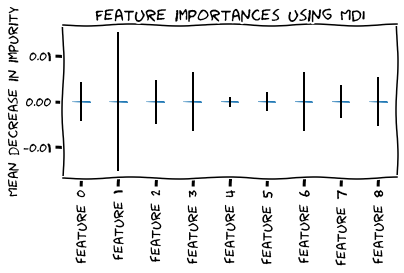

In [73]:
regression_importances = pd.Series(result, index=feature_names)

fig, ax = plt.subplots()
regression_importances.plot.bar(yerr=result_std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [74]:
y_pred_test_predict = logreg.predict(X_test)

y_pred_test_predict

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0])

In [75]:
x_pred_test_lr = logreg.predict_proba(X_test)[:,0]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [76]:
y_pred_test_lr = logreg.predict_proba(X_test)[:,1]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [77]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test_predict)))

Model accuracy score: 0.7989


In [80]:
from sklearn.pipeline import make_pipeline
# Create the pipeline having steps for standardization and estimator as LogisticRegression
#
pipeline = make_pipeline(StandardScaler(), LogisticRegression(solver='lbfgs', penalty='l2', max_iter=10000, random_state=1))
#
# Get Training and test scores using validation curve method
# Pay attention to the parameter values range set as param_range
#
param_range = [0.001, 0.05, 0.1, 0.5, 1.0, 10.0]
train_scores_lg, test_scores_lg = validation_curve(estimator=pipeline,
                                             X=X_train, y=y_train,
                                             cv=10,
param_name='logisticregression__C', param_range=param_range)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.

In [81]:
train_mean_lg = np.mean(train_scores_lg, axis=1)
test_mean_lg = np.mean(test_scores_lg, axis=1)

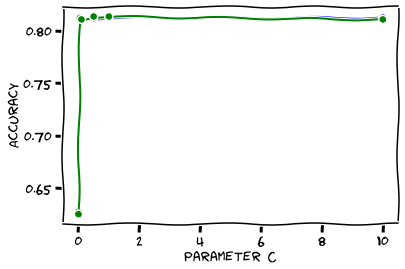

In [82]:
plt.plot(param_range, train_mean_lg,
         marker='o', markersize=5,
         color='blue', label='Training Accuracy')
plt.plot(param_range, test_mean_lg,
         marker='o', markersize=5,
         color='green', label='Validation Accuracy')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

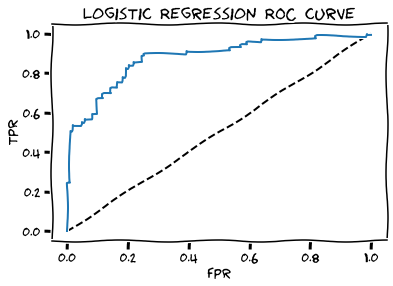

In [83]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_lr)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Logistic Regression')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Logistic Regression ROC curve')
plt.show()

# Discriminant analysis

In [99]:

X_norm = normalize(X_train)

In [102]:

lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(X_norm, y_train)

LinearDiscriminantAnalysis(n_components=1)

In [103]:
y_train_predict_lda = lda.predict_proba(X_train)
y_train_predict_lda = y_train_predict_lda[:,1]
y_train_predict_lda 


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([1.00000000e+00, 5.56572355e-17, 6.47229035e-02, 1.32807044e-20,
       3.91589587e-17, 3.39299640e-01, 2.42436859e-16, 1.00000000e+00,
       2.96170939e-28, 5.42034047e-17, 1.00000000e+00, 9.99999443e-01,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 3.40669503e-17,
       1.00000000e+00, 7.27635491e-17, 1.00000000e+00, 3.58319204e-02,
       1.54443849e-27, 5.40823017e-16, 1.00000000e+00, 2.22879738e-20,
       1.00000000e+00, 4.42528288e-16, 4.54077271e-14, 1.00000000e+00,
       7.19068889e-17, 1.00000000e+00, 8.81866875e-19, 1.29350567e-17,
       9.99999673e-01, 4.78282192e-10, 1.00000000e+00, 3.32132994e-15,
       2.99596407e-16, 1.28451074e-07, 1.69885285e-02, 1.00000000e+00,
       1.00000000e+00, 2.20711759e-16, 1.00000000e+00, 1.00000000e+00,
       4.92617047e-17, 2.71714203e-30, 3.34809999e-20, 3.20418074e-17,
       1.00000000e+00, 1.90331083e-25, 1.17985907e-16, 1.04548115e-15,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 4.50205634e-04,
      

In [104]:
y_test_predict_lda = lda.predict_proba(X_test )
y_test_predict_lda = y_test_predict_lda[:,1]
y_test_predict_lda

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([7.98151661e-10, 2.05405868e-17, 1.19041943e-21, 1.00000000e+00,
       1.00000000e+00, 9.99630547e-01, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 6.52232014e-29, 1.00000000e+00,
       3.40669503e-17, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       3.87562666e-15, 2.87674371e-01, 1.78696057e-17, 1.18270011e-03,
       9.47561412e-15, 1.00000000e+00, 3.30065956e-17, 9.99895679e-01,
       1.00000000e+00, 1.00000000e+00, 2.20827380e-17, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.25671554e-16, 1.00000000e+00,
       2.85027559e-15, 9.99999999e-01, 4.62327602e-30, 9.99176206e-01,
       6.27247078e-20, 1.01593055e-16, 1.03445486e-13, 3.86370402e-15,
       1.00000000e+00, 1.64781923e-17, 8.86945894e-10, 1.17458732e-10,
       1.00000000e+00, 4.92617047e-17, 4.92617047e-17, 1.00000000e+00,
       6.23898202e-15, 1.00000000e+00, 9.98692467e-01, 1.00000000e+00,
       1.00000000e+00, 2.99596407e-16, 9.97211384e-01, 1.00000000e+00,
      

In [105]:

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(lda, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.807 (0.045)


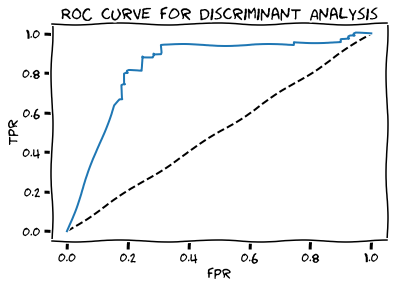

In [106]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict_lda)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Discriminant Analysis')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve for Discriminant Analysis')
plt.show()

In [107]:
dis_result = permutation_importance(lda, X_train, y_train, n_repeats=11,random_state=0)



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarn

In [108]:
dis_result_mean = dis_result.importances_mean

In [109]:
dis_result_std = dis_result.importances_std
dis_result_std

array([0.00199445, 0.0155184 , 0.00276217, 0.00649043, 0.00144455,
       0.01044648, 0.00370936, 0.00502357, 0.0027025 ])

In [112]:
feature_names = [f'feature {i}' for i in range(x.shape[1])]
feature_names


['feature 0',
 'feature 1',
 'feature 2',
 'feature 3',
 'feature 4',
 'feature 5',
 'feature 6',
 'feature 7',
 'feature 8']

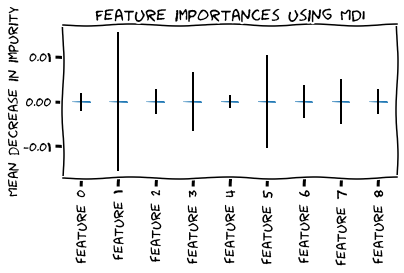

In [113]:
dis_importances = pd.Series(dis_result, index=feature_names)

fig, ax = plt.subplots()
dis_importances.plot.bar(yerr=dis_result_std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

#navies bayes

In [135]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [136]:
cols = X_train.columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])

X_test = pd.DataFrame(X_test, columns=[cols])

In [137]:
from sklearn.naive_bayes import GaussianNB

# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


GaussianNB()

In [138]:
y_pred = gnb.predict(X_test)

y_pred

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0])

In [139]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
accuracy_80 = accuracy_score(y_test, y_pred)
accuracy_80

Model accuracy score: 0.8101


0.8100558659217877

In [141]:
y_pred_train = gnb.predict(X_train)

y_pred_train

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,

In [142]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8104


In [145]:
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.8104
Test set score: 0.8101


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [146]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84       110
           1       0.73      0.80      0.76        69

    accuracy                           0.81       179
   macro avg       0.80      0.81      0.80       179
weighted avg       0.81      0.81      0.81       179



# splitting dataset into 70 and 30

In [147]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [148]:
cols = X_train1.columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train1 = scaler.fit_transform(X_train1)

X_test1 = scaler.transform(X_test1)

X_train1 = pd.DataFrame(X_train1, columns=[cols])

X_test1 = pd.DataFrame(X_test1, columns=[cols])

In [149]:
X_train1.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Minor,FamilySize,Alone
0,-1.532556,0.725921,1.646548,-0.457246,-0.472998,-0.122530,-0.317343,-0.548604,0.807787
1,-1.532556,-1.377561,1.493072,0.403371,-0.472998,0.918124,-0.317343,0.044765,-1.237950
2,0.848448,0.725921,-2.190368,3.845840,1.932533,0.299503,3.151162,3.604974,-1.237950
3,-1.532556,0.725921,1.876763,-0.457246,0.729768,0.929702,-0.317343,0.044765,-1.237950
4,0.848448,-1.377561,-0.118433,0.403371,-0.472998,-0.373297,-0.317343,0.044765,-1.237950


In [150]:
from sklearn.naive_bayes import GaussianNB

# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train1, y_train1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


GaussianNB()

In [151]:
y_pred1 = gnb.predict(X_test1)

y_pred

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0])

In [152]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test1, y_pred1)))
accuracy_70 = accuracy_score(y_test1, y_pred1)
accuracy_70

Model accuracy score: 0.8060


0.8059701492537313

# splitting dataset into 60 40

In [153]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(x, y, test_size = 0.4, random_state = 0)

In [154]:
cols = X_train2.columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train2 = scaler.fit_transform(X_train2)

X_test2 = scaler.transform(X_test2)

X_train2 = pd.DataFrame(X_train2, columns=[cols])

X_test2 = pd.DataFrame(X_test2, columns=[cols])

In [155]:
X_train2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Minor,FamilySize,Alone
0,0.837268,-1.351072,-0.082320,-0.465243,-0.482474,-0.503883,-0.321412,-0.558611,0.814587
1,-0.355002,0.740153,0.387268,-0.465243,-0.482474,-0.401871,-0.321412,-0.558611,0.814587
2,0.837268,-1.351072,1.091650,0.394410,6.641239,0.275648,-0.321412,3.568042,-1.227616
3,0.837268,-1.351072,-0.082320,2.113718,0.704812,-0.152714,-0.321412,1.799477,-1.227616
4,-1.547272,-1.351072,-0.082320,0.394410,-0.482474,2.009418,-0.321412,0.030911,-1.227616


In [156]:
from sklearn.naive_bayes import GaussianNB

# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train2, y_train2)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


GaussianNB()

In [157]:
y_pred2 = gnb.predict(X_test2)

y_pred2

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,

In [158]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test2, y_pred2)))
accuracy_60 = accuracy_score(y_test2, y_pred2)
accuracy_60

Model accuracy score: 0.7955


0.7955182072829131

# splitting dataset into 50 and 50

In [160]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(x, y, test_size = 0.5, random_state = 0)

In [161]:
cols = X_train3.columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train3 = scaler.fit_transform(X_train3)

X_test3 = scaler.transform(X_test3)

X_train3 = pd.DataFrame(X_train3, columns=[cols])

X_test3 = pd.DataFrame(X_test3, columns=[cols])

In [162]:
X_train3.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Minor,FamilySize,Alone
0,-0.356060,0.734706,0.080163,-0.45738,-0.50788,-0.402914,-0.322829,-0.56379,0.835747
1,-0.356060,0.734706,1.416416,-0.45738,-0.50788,-0.364468,-0.322829,-0.56379,0.835747
2,0.844295,0.734706,-0.391456,-0.45738,-0.50788,-0.502955,-0.322829,-0.56379,0.835747
3,0.844295,0.734706,-0.155647,-0.45738,-0.50788,-0.486294,-0.322829,-0.56379,0.835747
4,0.844295,-1.361089,-0.312853,-0.45738,-0.50788,-0.503354,-0.322829,-0.56379,0.835747


In [163]:
from sklearn.naive_bayes import GaussianNB

# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train3, y_train3)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


GaussianNB()

In [164]:
y_pred3 = gnb.predict(X_test3)

y_pred3

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,

In [165]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test3, y_pred3)))
accuracy_50 = accuracy_score(y_test3, y_pred3)
accuracy_50

Model accuracy score: 0.7960


0.7959641255605381

#  splitting dataset into 90 and 10

In [166]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(x, y, test_size = 0.1, random_state = 0)

In [167]:
cols = X_train4.columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train4 = scaler.fit_transform(X_train4)

X_test4 = scaler.transform(X_test4)

X_train4 = pd.DataFrame(X_train4, columns=[cols])

X_test4 = pd.DataFrame(X_test4, columns=[cols])

In [168]:
X_train4.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Minor,FamilySize,Alone
0,-1.607034,0.735109,-0.114382,-0.467354,-0.468066,-0.635797,-0.314270,-0.552765,0.807184
1,0.808039,0.735109,-0.804265,-0.467354,-0.468066,-0.475010,-0.314270,-0.552765,0.807184
2,-0.399497,0.735109,-2.030722,0.430369,0.765226,-0.106344,3.181981,0.675432,-1.238875
3,-1.607034,-1.360343,1.112075,-0.467354,0.765226,0.544867,-0.314270,0.061333,-1.238875
4,0.808039,-1.360343,-1.570800,2.225817,1.998518,-0.067653,3.181981,2.517727,-1.238875


In [169]:
from sklearn.naive_bayes import GaussianNB

# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train4, y_train4)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


GaussianNB()

In [170]:
y_pred4 = gnb.predict(X_test4)

y_pred4

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1])

In [171]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test4, y_pred4)))
accuracy_90 = accuracy_score(y_test4, y_pred4)
accuracy_90

Model accuracy score: 0.8444


0.8444444444444444

# Visualization of sample data size accuracy

In [173]:
sampleSize = ['90-10', '80-20', '70-30', '60-40', 50-50]
accuracy = [accuracy_90, accuracy_80, accuracy_70, accuracy_60, accuracy_50]
data_plot = pd.DataFrame({"Sample_size":sampleSize, "Accuracy":accuracy},index=[90 , 80 , 70 , 60 ,50])
 
data_plot.head()

,Sample_size,Accuracy
90,90-10,0.844444
80,80-20,0.810056
70,70-30,0.805970
60,60-40,0.795518
50,0,0.795964


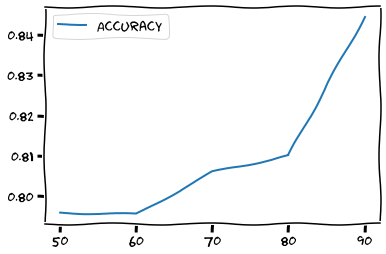

In [174]:
sns.lineplot(data=data_plot)

In [175]:
y_test_predict_nb = gnb.predict_proba(X_test)
y_test_predict_nb = y_test_predict_nb[:,1]
y_test_predict_nb

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


array([2.84458138e-02, 2.91613852e-02, 4.83018812e-04, 9.99963927e-01,
       7.65754087e-01, 1.91980020e-01, 9.99947334e-01, 9.99995956e-01,
       8.74566462e-01, 5.19425207e-01, 8.15568062e-02, 6.68810383e-01,
       2.91246873e-02, 9.99599321e-01, 9.82225123e-01, 9.96646187e-01,
       3.11988951e-02, 2.02887753e-01, 2.70983479e-02, 9.79637406e-01,
       6.94087407e-02, 9.99946104e-01, 2.91269522e-02, 1.92965100e-01,
       5.40135840e-01, 9.99863446e-01, 2.78027471e-02, 5.43005193e-01,
       9.00717064e-01, 5.54663303e-01, 2.74274791e-02, 6.75334939e-01,
       2.88451066e-02, 2.03512385e-01, 7.88464292e-02, 1.84811517e-01,
       2.66772736e-02, 5.87322439e-02, 6.08224223e-02, 5.60881467e-02,
       7.79470197e-01, 3.05242815e-02, 2.84448682e-02, 4.62826526e-04,
       9.92985265e-01, 2.90985536e-02, 2.90985536e-02, 1.00000000e+00,
       5.33940198e-02, 7.66262478e-01, 1.91030823e-01, 6.93734851e-01,
       9.99598998e-01, 3.39677447e-02, 1.90478376e-01, 1.34468833e-01,
      

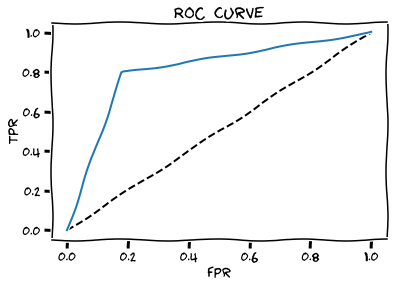

In [176]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Naive Bayes Classifier')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

# Time series cross validation

In [178]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import RepeatedKFold
kf = RepeatedKFold(n_splits=2, n_repeats=6, random_state=None) 

for train_index, test_index in kf.split(x):
      # print("Train:", train_index, "Validation:",test_index)
      X_train, X_test = x.iloc[train_index], x.iloc[test_index] 
      y_train, y_test = y.iloc[train_index], y.iloc[test_index]

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does n

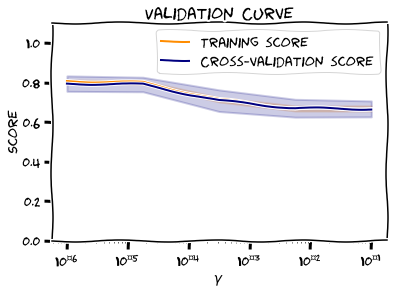

In [179]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.model_selection import validation_curve

param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(
    gnb,
    x,
    y,
    param_name="var_smoothing",
    param_range=param_range,
    scoring="accuracy",
    n_jobs=1,
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(
    param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw
)
plt.fill_between(
    param_range,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
plt.semilogx(
    param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw
)
plt.fill_between(
    param_range,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
plt.legend(loc="best")
plt.show()